<a href="https://colab.research.google.com/github/Gireesheruvaram/LLM-Beginer/blob/LLMadv-kata2-problem2/LLMAdVKata2problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/sample_data/cusRev.csv')

# Step 1: Preview the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                                              Review Sentiment
0  "This product is amazing! It works exactly as ...  positive
1  "This product is a complete waste of money. It...  negative
2  "The product is okay, but it could be better. ...   neutral
3  "I love this product! It's so cute and stylish...  positive
4  "The product arrived broken. I am very unhappy...  negative


In [ ]:
# Step 2: Preprocess the data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

df['Review'] = df['Review'].apply(preprocess_text)  # Preprocess reviews

# Calculate word count
df['WordCount'] = df['Review'].apply(lambda x: len(x.split()))

# Step 3: Calculate average word count for positive and negative reviews
positive_avg = df[df['Sentiment'] == 'positive']['WordCount'].mean()
negative_avg = df[df['Sentiment'] == 'negative']['WordCount'].mean()

print(f"Average word count for positive reviews: {positive_avg}")
print(f"Average word count for negative reviews: {negative_avg}")


Average word count for positive reviews: 16.0
Average word count for negative reviews: 16.125


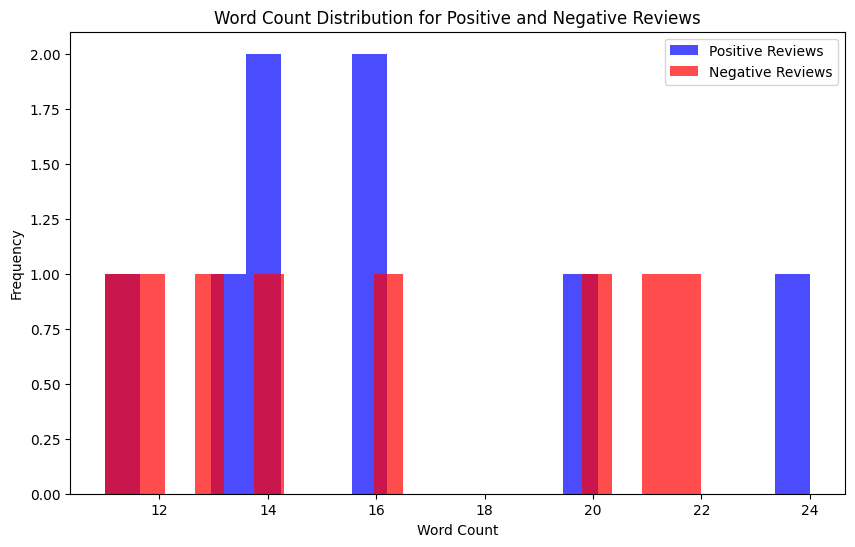

In [ ]:
# Step 4: Visualize word count distribution for positive and negative reviews
plt.figure(figsize=(10, 6))
plt.hist(df[df['Sentiment'] == 'positive']['WordCount'], bins=20, alpha=0.7, label='Positive Reviews', color='blue')
plt.hist(df[df['Sentiment'] == 'negative']['WordCount'], bins=20, alpha=0.7, label='Negative Reviews', color='red')
plt.title('Word Count Distribution for Positive and Negative Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


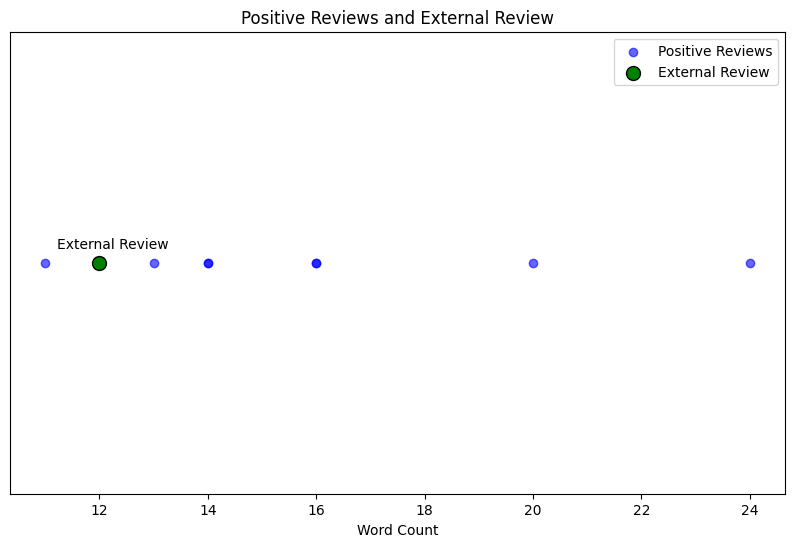

In [ ]:
# Step 5: Adjust external review to match positive review word count range
positive_word_counts = df[df['Sentiment'] == 'positive']['WordCount']
positive_avg_word_count = positive_word_counts.mean()

# Modify the external review to approximate the positive average word count
external_review = "The product is excellent, and I would highly recommend it to everyone!"
# external_review = "The product is verry bad and not much prefered by me"
external_review_processed = preprocess_text(external_review)
external_word_count = len(external_review_processed.split())

# Plot external review and positive reviews
plt.figure(figsize=(10, 6))
plt.scatter(positive_word_counts, np.zeros_like(positive_word_counts) + 1, label='Positive Reviews', color='blue', alpha=0.6)
plt.scatter(external_word_count, 1, label='External Review', color='green', edgecolor='black', s=100)
plt.title('Positive Reviews and External Review')
plt.xlabel('Word Count')
plt.yticks([])
plt.legend()
plt.annotate('External Review', (external_word_count, 1), textcoords="offset points", xytext=(10, 10), ha='center')
plt.show()
